<a href="https://colab.research.google.com/github/clementefg/Curso-de-introduccion-a-Big-Data-Parte-2-nov2021/blob/main/1_Librer%C3%ADa_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numpy

NumPy es, al igual que Pandas, Matplotlib o Scikit-Learn, uno de los paquetes que no puedes perderte cuando estás aprendiendo Machine Learning, principalmente porque esta librería proporciona una estructura de datos de matriz que tiene algunos beneficios sobre las listas regulares de Python. Algunos de estos beneficios son: ser más compacto, acceder más rápido a leer y escribir artículos, ser más conveniente y más eficiente.

NumPy es un paquete de Python que significa “Numerical Python”, es la librería principal para la informática científica, proporciona potentes estructuras de datos, implementando matrices y matrices multidimensionales. Estas estructuras de datos garantizan cálculos eficientes con matrices.

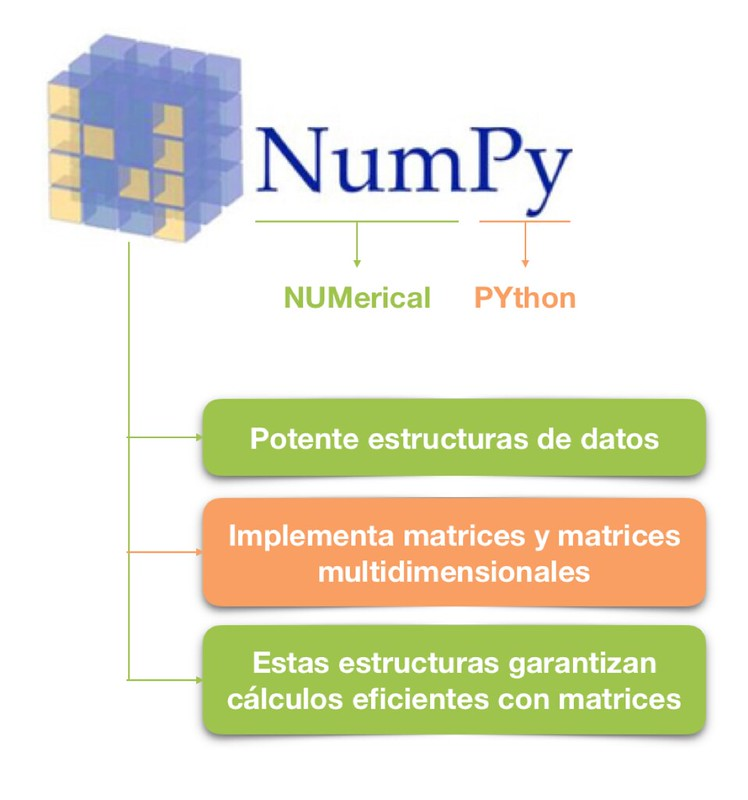

**Numpy** (Numerical Python) amplía las capacidades de python, agregando mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices. Todo ello a partir los ``arrays`` que son un nuevo tipo de contenedor que es un **objeto array multi-dimensional y de tipo fijo**, además de una serie de rutinas que amplían las capacidades de las listas de Python de forma muy eficiente. 

En esencia, los ``arrays`` de NumPy son como el tipo de dato ``list`` de Python, pero implementadas de manera que se optimiza la utilizacion de memoria y procesamiento en su manipulación, gracias a que todos sus elementos son de un mismo tipo. Ello permite que pueda trabajarse con mayores cantidades de datos.

La librería NumPy es el nucleo del ecosistema de librerías de tratamiento de datos en Python, por ello es importante comprender su funcionamiento.

NumPy contiene entre otras herramientas:

- El objeto ``array`` N-dimensional
- Funciones de manipulacion de ``arrays`` muy potentes
- Herramientas para integrar código C/C++ y Fortran
- Funciones de Algebra Lineal, Transformadas de Fourier y generadores pseudo-aleatorios


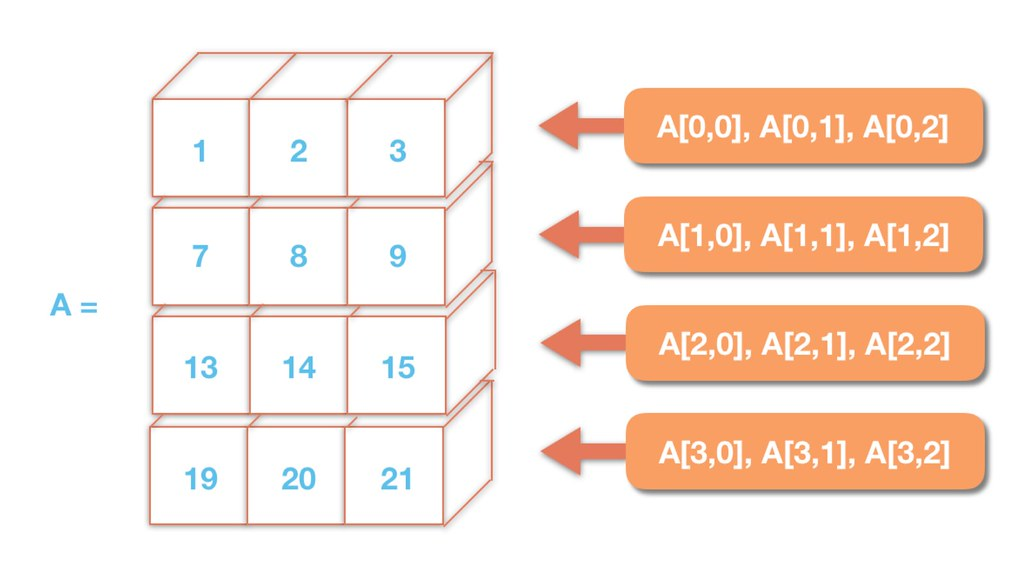

Hablemos ahora sobre NumPy array o el arreglo de matrices de NumPy. NumPy array es un potente objeto de matriz N-dimensional que tiene forma de filas y columnas, en la que tenemos varios elementos que están almacenados en sus respectivas ubicaciones de memoria. Pero, a que se refiere exactamente esto, veamos la siguiente imagen, esta es una matriz bidimensional porque tiene filas y columnas, como puedes ver tiene cuatro filas y tres columnas, por lo que se convierte en una matriz bidimensional. En el caso de que solo tuviera una hilera entonces habría sido una matriz unidimensional.



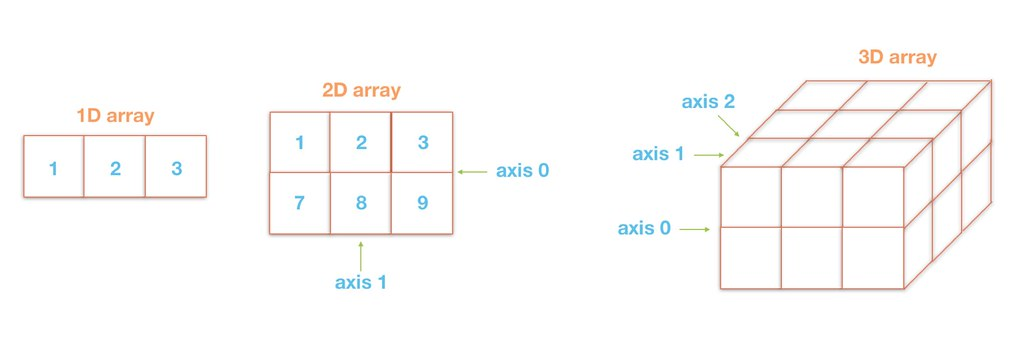

Según lo explicado anteriormente en la primera figura tenemos una matriz unidimensional o 1D. En la segunda figura, tenemos una matriz bidimensional o 2D, en donde las filas se indican como el eje 0, mientras que las columnas son el eje 1.

Toma en cuenta que el número de ejes aumenta de acuerdo con el número de dimensiones, en matrices 3D, se tendrá un eje 2 adicional, ten en cuenta que estos ejes sol son válidos para matrices que tienen al menos dos dimensiones, ya que no tiene sentido esto para matrices unidimensional.



In [5]:
import numpy as np

Con la primera instrucción le estamos diciendo a nuestro programa de Python que de ahora en adelante np será la referencia para todo lo referente a NumPy.

Podemos consultar su versión:

In [ ]:
print("numpy version: {}".format(np.__version__))

numpy version: 1.19.5


La web oficial de estas librerías es [numpy.org](https://www.numpy.org).

En la web podemos encontrar toda la info sobre las mismas:
- [tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- [documentación](https://docs.scipy.org/doc/)
- [lista de comandos](https://docs.scipy.org/doc/numpy/reference/routines.html)

Para obtener info sobre los comandos de NumPy podemos utilizar las funciones de ayuda de IPython ``?`` y ``<TAB>``:

In [ ]:
np?

##Motivación Arrays de NumPy

Seguramente te preguntarás porque usar NumPy en vez de utilizar las listas propias que ofrece Python para manejar estos datos, la primera razón es que NumPy ocupa menos memoria en comparación a las lista de Python, a su vez es bastante rápido en términos de ejecución. 
La motivación de NumPy surge de la necesidad de optimizar el trabajo con listas en Python. Las lista en Python son especialmente ineficientes debido a la que Python es un lenguaje dinámicamente tipado. Esta flexibilidad es una de las pieza que hace que Python sea muy fácil de usar, aunque también implica que las variables de Python son más que solo su valor sino una estructura compuesta (contienen además información adicional sobre el tipo del valor). Por lo que es necesario almacenamiento extra Python en comparación con el necesario en un lenguaje compilado y fuertemente tipado como C

Un entero en C es esencialmente una etiqueta para una posición en la memoria cuyos bytes codifican un valor entero. Un número entero de Python es un objeto. Esto se traduce a que un númepor en Python es puntero a una posición en la memoria que contiene toda la información del objeto de Python, referencias, el código de tipo, incluidos los bytes que contienen el valor entero. Esta información adicional es lo que permite que Python sea dinámicamente tipado. Toda esta información adicional tiene un coste, tanto en almacenamienteo como en tiempo, que se vuelve especialmente evidente en las estructuras que combinan muchos de estos objetos, como pueden ser las list.

Como las list permiten tipos flexibles, cada elemento de una variable de tipo list debe contener su propia información de tipo, referencias, etc, ya que cada elemento es un objeto completo de Python. En el caso especial de que todos los elementos de la lista sean del mismo tipo, gran parte de esta información es redundante, y sería mucho más eficiente almacenar datos en un array de tipo fijo. 

A nivel de implementación, un array de Numpy contiene un solo puntero a un bloque contiguo de datos que forman array de información. La lista de Python, por otro lado, contiene un puntero a un bloque de punteros, cada uno de los cuales apunta a un objeto completo de Python como el número entero de Python que vimos anteriormente. Una vez más, la ventaja de la lista es la flexibilidad: dado que cada elemento de la lista es una estructura completa que contiene información tanto de datos como de tipo, y la lista se puede completar con datos de cualquier tipo deseado. Los arrays de NumPy carecen de esta flexibilidad, pero son mucho más eficientes para almacenar y manipular datos.

Pero veamos esto en el siguiente ejemplo:

In [ ]:
import sys
S= range(1000)
print(sys.getsizeof(5)*len(S))
 
D= np.arange(1000)
print(D.size*D.itemsize)

28000
8000


Este resultado muestra que la memoria asignada para la matriz creada por Python es de 28000, mientras que la memoria asignada por la matriz NumPy es de solo 8000, con esto podemos concluir que hay una gran diferencia entre los dos y esto hace que las matrices creadas con NumPy sea la opción preferida.

Evaluemos ahora la rapidez.

In [ ]:
import time
 
SIZE = 1000000
 
L1= range(SIZE)
L2= range(SIZE)
A1= np.arange(SIZE)
A2=np.arange(SIZE)
 
start= time.time()
result=[(x,y) for x,y in zip(L1,L2)]
print((time.time()-start)*1000)
 
start=time.time()
result= A1+A2
print((time.time()-start)*1000)

277.7214050292969
56.931495666503906


En este código se han definido dos listas en Python y dos matrices esta vez utilizando NumPy, posteriormente hemos comparado el tiempo tomado para encontrar la suma de los elementos. Si observas los resultados, hay una diferencia significativa entre los dos, en el primero obtuvimos más de 200 ms mientras que la operación realizada con NumPy solamente tomó en torno a 50 ms en ser ejecutada. Por lo tanto, las matriz creadas con NumPy son más rápida que la listas creadas directamente por Python.

Otro detalle que tienes que ver es que para hacer esta operación para el primer caso tuvimos que utilizar “for”, mientras que para el segundo caso simplemente sumamos las dos matrices sin mucho esfuerzo.

Como puedes observar con estos ejemplos prácticos, trabajar con NumPy es mucho más fácil y conveniente en comparación con las listas propias de Python, es por esta razón que es utilizado bastante en el desarrollo de los algoritmos de Machine Learning.

##Definir una matriz con Numpy
Para hacer una matriz NumPy, puedes usar la función np.array(). Todo lo que necesitas hacer es colocarle una lista y, opcionalmente, también puedes especificar el tipo de datos a utilizar.

Recuerda que los tipos de datos están ahí cuando necesites más control sobre cómo se almacenan sus datos en la memoria y en el disco, especialmente en casos en los que estes trabajando con datos grandes, es bueno que sepas controlar el tipo de almacenamiento.

Al mismo tiempo recuerda, que para trabajar con la función np.array() debes asegurarte de que la librería esté presente en el entorno, es decir debes importarla primeramente definiéndola como np.

In [ ]:
import numpy as np

Sabiendo todo esto, creemos ahora dos matrices una unidimensional y otra bidimensional, estoy utilizando por supuesto NumPy.

In [ ]:
a=np.array([1,2,3])
print(a)

[1 2 3]


In [ ]:
b=np.array([(1,2,3),(4,5,6)])
print(b)

[[1 2 3]
 [4 5 6]]


Al llamar a ``np.array`` usando lista anidadas podemos hacer arrays de NumPy multi-dimensionales o matrices.

In [ ]:
# listas anidadas dan como resultado arrays multi-dimensionales 
a = np.array([[1,2],[3,4]])
print(a)

[[1 2]
 [3 4]]


Podemos definir el tipo de dato del array

In [ ]:
array = np.array([[1,2,3,4], [5,6,7,8]], dtype=np.int64)
print(array)

[[1 2 3 4]
 [5 6 7 8]]


De esta manera, muy simple, podemos declarar las matrices dentro de NumPy. 

##Matrices Vacías
En ocasiones se requiere crear matrices vacías, esto se refiere a que se requieren marcadores de posición iniciales, que luego pueden ser rellenados. Se puede inicializar matrices con unos o ceros, pero también puedes hacer matrices que se llenan con valores espaciados uniformemente, valores constantes o aleatorios.

Algunas de las instrucciones para crear este tipo de matrices son las siguientes:

Para crear una matriz en donde todos los valores sean igual a 1, solamente debemos utilizar np.ones y colocar la cantidad de filas y columnas que contendrá la matriz.

In [6]:
# Crear una matriz de unos - 3 filas 4 columnas
unos = np.ones((3,4))
print(unos)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Para crear una matriz en donde todos los valores sean igual a 0, se utiliza la instrucción np.zeros y colocamos la cantidad de filas y columnas que contendra la matriz.

In [ ]:
# Crear una matriz de ceros - 3 filas 4 columnas
ceros = np.zeros((3,4))
print(ceros)

En caso de que se requiera crear una matriz con números aleatorios solamente debemos utilizar la instrucción np.random.random y definir el número de filas y columnas.

In [ ]:
# Crear una matriz con valores aleatorios
aleatorios = np.random.random((2,2))
print(aleatorios)

[[0.74509066 0.71895547]
 [0.41876006 0.10126711]]


Para crear una matriz vacía se utiliza la instrucción np.empty definiendo el número de filas y columnas.

In [ ]:
# Crear una matriz vacía
vacia = np.empty((3,2))
print(vacia)

[[4.67466319e-310 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000]]


Si lo que quieres es crear una matriz que contenga un solo valor en todas las posiciones utilizamos la instrucción np.full, definimos el número de filas y columnas, y a su vez definimos el valor que queremos en todas las posiciones, para nuestro ejemplo ese valor será igual a 8.

In [ ]:
# Crear una matriz con un solo valor
full = np.full((2,2),8)
print(full)

[[8 8]
 [8 8]]


Para crear matrices con valores espaciados uniformemente Podemos utilizer np.arange() y np.linspace(). La diferencia entre estas dos funciones es que para la primera se especifica que se desea crear una matriz que comience en 0 y por pasos de 5 genere los valores para la matriz que está creando. Por su parte para el segundo caso, se requiere una matriz con 5 valores que se encuentren entre 0 y 2.

In [7]:
# Crear una matriz con valores espaciados uniformemente
espacio1 = np.arange(0,30,5)
print(espacio1)
espacio2 = np.linspace(0,2,5)
print(espacio2)

[ 0  5 10 15 20 25]
[0.  0.5 1.  1.5 2. ]


NumPy también permite crear matrices identidad utilizando las funciones np.eye() y np.identity(). Recuerda que una matriz de identidad es una matriz cuadrada de la cual todos los elementos en la diagonal principal son igual a 1 y todos los demás elementos son igual a 0.

In [8]:
# Crear una matriz identidad
identidad1 = np.eye(4,4)
print(identidad1)
identidad2 = np.identity(4)
print(identidad2)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Tipos de Datos Estandar en NumPy

Además del tipo ``array``, NumPy implenta otros tipos datos. Los estándar aparecen en la siguiente tabla:

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

A la hora de crear un array en NumPy, si los tipos no coinciden, NumPy reubicará el array si es posible (en este caso, los enteros se elevan al punto flotante):

In [ ]:
np.array([3.14, 4, 2, 3])

array([ 3.14,  4.  ,  2.  ,  3.  ])

In [ ]:
np.array([3.14, 'a', 2, 3])

array(['3.14', 'a', '2', '3'],
      dtype='<U32')

Si queremos establecer explícitamente el tipo de datos del array, podemos usar la palabra clave ``dtype``:

In [ ]:
np.array([1, 2, 3, 4], dtype='float32')

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [ ]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

o usando el objeto NumPy asociado:

In [ ]:
np.zeros(10, dtype=np.int16)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

##Inspeccionar las matrices de NumPy
NumPy contiene varias instrucciones para obtener más información sobre las matrices que se han creado utilizando esta librería algunas de ellas son las siguientes:

Puedes encontrar la dimensión de la matriz, ya sea una matriz bidimensional o una matriz dimensional única, utilizando la función “ndim”.

In [9]:
# Conocer las dimensiones de una matriz
a = np.array([(1,2,3),(4,5,6)])
print(a.ndim)

2


También puedes encontrar el tipo de datos de los elementos que están almacenados en una matriz, para ello utilizar la función “dtype”, el cual arrojará el tipo de datos junto con el tamaño.

In [10]:
# Conocer el tipo de los datos
a = np.array([(1,2,3)])
print(a.dtype)

int64


Del mismo modo, puedes encontrar el tamaño y la forma de la matriz con la función “size” y “shape”, respectivamente.

In [11]:
# Conocer el tamaño y forma de la matriz
a = np.array([(1,2,3,4,5,6)])
print(a.size)
print(a.shape)

6
(1, 6)


##Cambio de tamaño y forma de las matrices
Otras de las operaciones que podemos realizar con NumPy es el cambio de tamaño y forma de las matrices, veamos prácticamente a que se refiere esto.

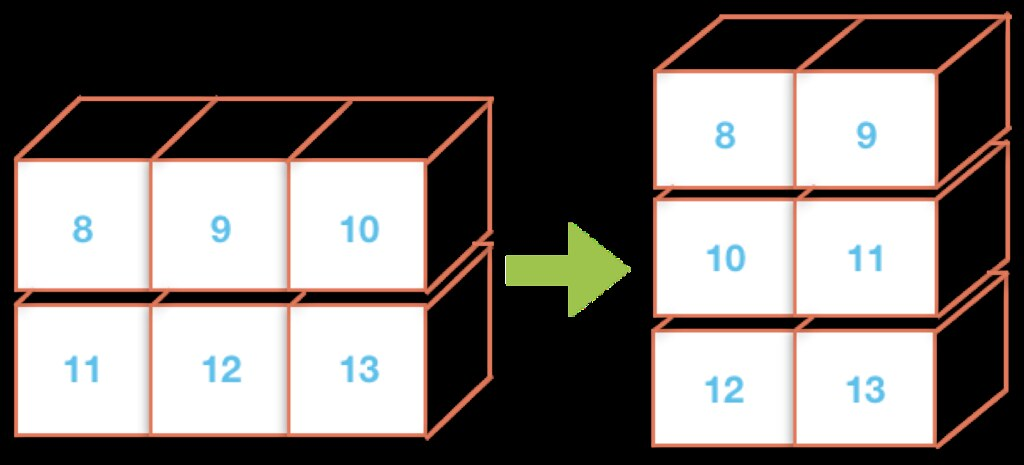

El cambio de la forma de las matrices es cuando se cambia el número de filas y columnas que le da una nueva vista a un objeto.

Como puedes ver en la imagen, tenemos 3 columnas y 2 filas que se han convertido en 2 columnas y 3 filas utilizando la instrucción “reshape”.

In [13]:
# Cambio de forma de una matriz
a = np.array([(1,2,3),(4,5,6)])
print(a)
a=a.reshape(3,2)
print(a)

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


Otra funciones que podemos utilizar con NumPy es seleccionar un solo elemento de la matriz, para ello solamente tenemos que especificar el número de columna y fila en donde está ubicado y nos devolverá el valor almacenado en dicha ubicación.

In [14]:
# Extraer un solo valor de la matriz - el valor ubicado en la fila 0 columna 2
a=np.array([(1,2,3,4),(3,4,5,6)])
print(a[0,2])

3


Utilizando este mismo método podemos obtener todos los valores ubicados en la columna 3 de todas las filas. Para ello simplemente le decimos que desde la fila 0 en adelante, los dos puntos representa todas las filas, va a tomar el valor de la columna 2. Recuerda que la numeración de filas y columnas siempre comienza en 0. Hay que leerlo como dame de todas las filas 0: la columna 2.

In [16]:
# Extraer los valores de todas las filas ubicados en la columna 3 
a=np.array([(1,2,3,4),(3,4,5,6)])
print(a)
print(a[0:,2])

[[1 2 3 4]
 [3 4 5 6]]
[3 5]


Operaciones matemáticas entre matrices
Con la librería de NumPy puedes realizar de manera muy fácil operaciones aritméticas, veamos algunas de ellas.

Podemos encontrar el valor mínimo, máximo y la suma de la matriz con NumPy, para ello utilizamos “min”, “max” y “sum”, respectivamente.

In [ ]:
# Encontrar el mínimo, máximo y la suma
a= np.array([2,4,8])
print(a.min())
print(a.max())
print(a.sum())

También puedes obtener la raíz cuadrada y la desviación estándar de la matriz.

In [ ]:
# Calcular la raíz cuadrada y la desviación estándar
a=np.array([(1,2,3),(3,4,5,)])
print(np.sqrt(a))
print(np.std(a))

Puedes realizar más operaciones con las matrices de NumPy, como son la suma, resta, multiplicación y división de las dos matrices.



In [ ]:
# Calcular la suma, resta, multiplicación y división de dos matrices
x= np.array([(1,2,3),(3,4,5)])
y= np.array([(1,2,3),(3,4,5)])
print(x+y)
print(x-y)
print(x*y)
print(x/y)

Para transponer la matriz (permutar filas en columnas y columnas en filas)

In [ ]:
x= np.array([(1,2,3),(3,4,5)])
x

array([[1, 2, 3],
       [3, 4, 5]])

In [ ]:
x.shape

(2, 3)

In [ ]:
x.T

array([[1, 3],
       [2, 4],
       [3, 5]])

In [ ]:
x.T.shape

(3, 2)

In [ ]:
x.T.T

array([[1, 2, 3],
       [3, 4, 5]])

##  Generador de Arrays de NumPy Pseudo-aleatorios

NumPy posee un generador de números pseudoaleatorios basado en Mersenne Twister, que se puede importar con ``numpy.random``. Con las funciones que implementa podemos generar muestras aleatorias con diferentes distribuciones.

Consulta la documentación de ``numpy.random.<TAB>`` y verás las diferentes métodos:
 - ``RandomState`` fija una semilla: ``np.random.RandomState?``
 - Generadores aleatorios según diferentes distribuciones: ``np.random.rand?``, ``np.random.randn?``,etc...

In [ ]:
np.random.random?

In [ ]:
# Generador de números pseudoaleatorios Mersenne Twister. 
# Con una semilla fija y una serie fija de llamadas a métodos 'RandomState' 
# usando los mismos parámetros producirán siempre los mismos resultados.
np.random.RandomState(42)

 ### Distribución Uniforme

In [ ]:
# Crea una matriz 3x3 de números decimales aleatorios con distribución uniforme 
# en el intervalo [0, 1). random() puede generar 0, pero no 1. 
np.random.rand(3, 3)

array([[ 0.41324578,  0.78252482,  0.22532996],
       [ 0.62923897,  0.65427314,  0.29128763],
       [ 0.78853086,  0.5574538 ,  0.10279323]])

In [ ]:
# Crea una matriz 3x3 de números decimales aleatorios con distribución uniforme 
# continua en el intervalo [0, 1).
np.random.random((3, 3))

array([[ 0.750012  ,  0.34395406,  0.8393172 ],
       [ 0.22008712,  0.40445804,  0.77431442],
       [ 0.67653498,  0.20542669,  0.57792393]])

In [ ]:
# Crear un array 3x3 de números enteros aleatorios con distribución uniforme discreta 
# en el intervalo [0, 10)
np.random.randint(0, 10, (3, 3))

array([[4, 2, 4],
       [3, 9, 3],
       [7, 7, 6]])

In [ ]:
# Crear un array uni-dimensional de 10 números aletorios con distribución uniforme
# en el intervalo [0.5, 1.0)
np.random.uniform(0.5, 1.0, 10)

array([ 0.66131649,  0.93907371,  0.60665677,  0.72942079,  0.54363631,
        0.72018073,  0.82528127,  0.7411221 ,  0.59883279,  0.94002151])

 ### Distribución Normal (Gaussiana)

In [ ]:
# Crear una matriz de 3x3 de números decimales con distribución normal estándar. 
# Es decir, con media 0 y desviación estándar 1
np.random.randn((3, 3))

array([[-0.02580261, -2.29089283, -0.33015743],
       [ 0.82465012,  1.16541714,  1.7864258 ],
       [-0.33083197,  0.23366834, -0.6410964 ]])

In [ ]:
# Crear una matriz de 3x3 de números decimales on distribución normal
# con media 1 y desviación estándar 2
np.random.normal(1, 2, (3, 3))

array([[ 0.41323705,  1.95636515, -1.30520331],
       [-1.58661514,  0.66068625,  3.16891929],
       [ 1.3680463 , -2.07400911, -2.06474996]])

## Indexado de Arrays: Acceder a Elementos Individuales

Generamos varios arrays para ver cómo acceder a sus elementos

In [ ]:
import numpy as np
np.random.seed(0)  # semilla para reproducir los mismo resultados

x1 = np.random.randint(10, size=6)  # Arrays uni-dimensional
x2 = np.random.randint(10, size=(3, 4))  # Arrays bi-dimensional
x3 = np.random.randint(10, size=(3, 4, 5))  # Arrays tri-dimensional

In [ ]:
x1

array([5, 0, 3, 3, 7, 9])

In [ ]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [ ]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

En un array uni-dimensional de NumPy se puede acceder al valor de la posición i (contando desde cero) especificando su índice entre corchetes, al igual que con las listas de Python:

In [ ]:
x1

array([5, 0, 3, 3, 7, 9])

In [ ]:
x1[0]

5

In [ ]:
x1[4]

7

Para indexar desde el final se pueden usar índices negativos:

In [ ]:
x1[-1]

9

In [ ]:
x1[-2]

7

En un array multi-dimensional se puede acceder a los elementos con una tupla formada por los índices separados por comas:

In [ ]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [ ]:
x2[0, 0]

3

In [ ]:
x2[2, 0]

1

In [ ]:
x2[2, -1]

7

Esta notación también la podemos utilizar para modificar el valor de los elementos del array:

In [ ]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## Acceder a Subarrays

Del mismo modo que podemos usar corchetes para acceder a elementos de matriz individuales, también podemos usarlos para acceder a subarrays marcados con dos puntos (``: ``).
``` python
x[ini:fin:paso]
```
Donde ``ini`` es la posición del array donde se empieza el *trozo* que queremos seleccionar, ``fin`` , es la primera posición del array que no entraria en el *trozo* que queremos seleccionar (la posterior a la última que podemos seleccionar), y ``paso`` es el número de elementos entre un seleccionado y otro.

Si alguno de estos parámetros no está especificado, se predeterminan a los valores ``ini = 0``, ``fin = ``*``tamaño de la dimensión``* y ``paso = 1``.

### Subarrays de Arrays Uni-dimensionales

In [ ]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x[0:5:1]  # primeros cinco elementos

array([0, 1, 2, 3, 4])

In [ ]:
x[:5]  # primeros cinco elementos

array([0, 1, 2, 3, 4])

In [ ]:
x[5:]  # elementos después del índice 5

array([5, 6, 7, 8, 9])

In [ ]:
x[3:7]  # 4 elementos en el medio

array([3, 4, 5, 6])

In [ ]:
x[::2]  # desde el principio cada 2 elementos

array([0, 2, 4, 6, 8])

In [ ]:
x[1::2]  # desde el principio cada 2 elementos, comenzando en el índice 1

array([1, 3, 5, 7, 9])

### Subarrays de Arrays Multi-dimensionales

Las divisiones de arrays multi-dimensionales funcionan de la misma manera, con varias divisiones separadas por comas.

In [ ]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [ ]:
x2[:2, :3]  # dos filas, tres columnas

array([[12,  5,  2],
       [ 7,  6,  8]])

In [ ]:
x2[0:2:1, 0:3:1]  # dos filas, tres columnas

array([[12,  5,  2],
       [ 7,  6,  8]])

In [ ]:
x2[:, ::2]  # de todas las filas, cada 2 columnas

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

## Forma de un Arrays

Para cambiar la forma de un array de NumPy podemos usar el metodo ``reshape``. Hay que tener en cuenta que tamaño del array inicial debe coincidir con el tamaño al que la queremos transformarla.

In [ ]:
grid = np.arange(1, 10)
print(grid)
grid.shape

[1 2 3 4 5 6 7 8 9]


(9,)

In [ ]:
grid2 = grid.reshape((3, 3))
print(grid2)
grid2.shape

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(3, 3)

In [ ]:
print(grid.size)
print(grid2.size)

9
9


Un patrón común de transformación es la conversión de una matriz uni-dimensional en una matriz bi-dimensional. Esto se puede hacer con el método ``reshape``, o más fácilmente haciendo uso de la palabra clave ``newaxis`` dentro de una operación de troceado del array:

In [ ]:
# array de 3 elementos
x = np.array([1, 2, 3])
print(x)
x.shape

[1 2 3]


(3,)

In [ ]:
# tranformación a array bi-dimensional con 1 fila y 3 columnas via reshape
x4 = x.reshape((1, 3))
print(x4)
x4.shape

[[1 2 3]]


(1, 3)

In [ ]:
# tranformación a array bi-dimensional con 1 fila y 3 columnas via newaxis
x5 = x[np.newaxis, :]
print(x5)
x5.shape

[[1 2 3]]


(1, 3)

In [ ]:
# tranformación a array bi-dimensional con 3 filas y 1 columna via reshape
x4 = x.reshape((3, 1))
print(x4)
x4.shape

[[1]
 [2]
 [3]]


(3, 1)

In [ ]:
# tranformación a array bi-dimensional con 3 filas y 1 columna via newaxis
x5 = x[:, np.newaxis]
print(x5)
x5.shape

[[1]
 [2]
 [3]]


(3, 1)

## *Vectorización* de Operadores en Arrays de NumPy

Para muchos operadores NumPy proporciona un interfaz para aplicar dicho operador
a cada elemento del array. Esto se puede lograr simplemente usando el operador sobre el array lo que significará aplicarlo a cada uno de sus elementos. En NumPy esto se conoce como * vectorización * de operadores.

Este enfoque vectorizado está diseñado para impulsar la ejecución a la capa compilada que subyace bajo NumPy, lo que implica una ejecución mucho más rápida.

In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


Además, estos simplificación a la llamada de funciones de NumPy pueden combinarse como se desee, y se respeta el orden estándar de los mismos:

In [ ]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

Esta forma de aplicar operadores aritméticos a arrays de NumPy no es más que una simplificación a la hora de llamar de funciones de NumPy. La siguiente tabla enumera los operadores aritméticos y las funciones implementados en NumPy:

| Operador	    | Función NumPy       | Descrición                            |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Suma     (ej., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Resta       (ej., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Negación       (ej., ``-2``)          |
|``*``          |``np.multiply``      |Multiplicación (ej, ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |División (ej., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Division suelo (ej., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponenciación (ej., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulos/resto     (ej., ``9 % 4 = 1``)|

In [ ]:
np.add(x, 5)

array([5, 6, 7, 8])

In [ ]:
x + 5

array([5, 6, 7, 8])

Con los operadores de comparación sucede lo mismo. La siguiente tabla enumera los operadores y las funciones de comparación implementados en NumPy:

| Operador	    | Función NumPy       || Operador	   | Función NumPy       |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

In [ ]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

También se puede hacer una comparación de elementos de varios arrays incluyendo expresiones compuestas:

In [ ]:
(2 * x) == (x ** 2)

array([[False,  True, False, False],
       [False, False, False, False],
       [ True, False, False, False]])

## Funciones de Agregación

A menudo, para trabajar con una gran cantidad de datos, primer es mejor calcular estadísticas de resumen para los datos en cuestión. Quizás las estadísticas de resumen más comunes son la media y la desviación estándar, pero también son útiles otras agregaciones (suma, producto, mediana, mínimo y máximo, cuantiles, etc.). NumPy tiene funciones de agregación integradas para trabajar con sus arrays.

La siguiente tabla proporciona una lista de funciones de agregación disponibles en NumPy:

|Función            |   Versión NaN-safe  | Descripción                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Calcula la suma de los elementos              |
| ``np.prod``       | ``np.nanprod``      | Calcula el producto de los elementos          |
| ``np.mean``       | ``np.nanmean``      | Calcula la media de los elementos             |
| ``np.std``        | ``np.nanstd``       | Calcula la desviación estandar de los elementos  |
| ``np.var``        | ``np.nanvar``       | Calcula la varianza                           | 
| ``np.min``        | ``np.nanmin``       | Encuentra el valor mínimo                     |
| ``np.max``        | ``np.nanmax``       | Encuentra el valor máximo                     |
| ``np.argmin``     | ``np.nanargmin``    | Encuentra el indice de valor mínimo           |
| ``np.argmax``     | ``np.nanargmax``    | Encuentra el indice de valor máximo           |
| ``np.median``     | ``np.nanmedian``    | Calcula la mediana de los elementos           |
| ``np.percentile`` | ``np.nanpercentile``| Calcula los percentiles de los elementos      |
| ``np.any``        | N/A                 | Evalua si algún elemento es verdadero         |
| ``np.all``        | N/A                 | Evalua si todos los elementos son verdaderos  |


In [ ]:
big_array = np.random.rand(1000000)
np.sum(big_array)

500209.12067471276

## Info sobre las funciones de Numpy

La funcion ``np.info`` nos da información sobre la utilización de las funciones de Numpy

In [ ]:
np.info(np.random.normal)

normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``loc`` and ``sca

---

#Ejercicios

## Ejercicio 1

Crear una matriz de NumPy de 5x5 fromada por números enteros aleatorios entre 0 y 10  y normalizarla. Para la normalización, tenemos que calcular los valores máximo y mínimos de la matriz, y aplicamos a cada elemento x de la misma la siguiente formula (x - min) / (max - min).

## Ejercicio 2

Dado un array uni-dimensional que contenga los 10 primeros números enteros, negar todos los elementos cuyos valores que esten entre 3 y 8, en el propio array.

## Ejercicio 3

Crear un array bi-dimensional de NumPy de números enteros aleatorio en el intervalo [0, 3) con forma (3, 10), y calcular si tiene alguna columna con todos los valores a 0. Usar la función ``np.any()``.

## Ejercicio 4

Considerar el array de NumPy [1, 2, 3, 4, 5]. A partir de él construir un nuevo array con 3 ceros consecutivos entre cada par de valores.

## Ejercicio 5

Crear un array bi-dimensional de NumPy de números aleatorios con forma (4, 6) y restar a cada elemento la media de su fila.

## Ejercicio 6

Crear un array uni-dimensional de NumPy de 5 números aleatorio, y encontrar el más cercano a 0.5. Usar las funciones ``np.flat()``, ``np.abs()`` y ``np.argmin()``.

## Ejercicio 7

Crear un array bi-dimensional de NumPy de números aleatorios con forma (5, 2), que represente coordenadas y encontrar distancias punto por punto.